In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv('abide_compiled_data_20190707.csv')

In [10]:
df.shape

(1035, 95)

In [11]:
df.head()

,Unnamed: 0,sub_id,site_id,file_id,dx_group,age_at_scan,sex,handedness_category,fiq,handedness_recode,...,R_precentral,R_precuneus,R_rostral_anterior_cingulate,R_rostral_middle_frontal,R_superior_frontal,R_superior_parietal,R_superior_temporal,R_supramarginal,R_transverse_temporal,R_insula
0,0,50003,PITT,Pitt_0050003,1,24.45,1,R,124.0,R,...,1.201163,2.125226,3.498914,2.340307,2.085285,0.950366,1.807719,1.565881,1.833145,3.194357
1,1,50004,PITT,Pitt_0050004,1,19.09,1,R,113.0,R,...,1.862501,2.715785,3.871004,2.626445,2.471903,1.558296,2.666532,2.430273,2.103015,4.404319
2,2,50005,PITT,Pitt_0050005,1,13.73,0,R,119.0,R,...,1.492682,2.147347,3.228483,2.539060,2.405678,1.354254,1.967489,1.721139,1.411481,3.148464
3,3,50006,PITT,Pitt_0050006,1,13.37,1,L,109.0,L,...,1.973964,3.026796,4.073865,2.855339,2.869385,1.870028,2.676286,2.531543,2.043278,3.620175
4,4,50007,PITT,Pitt_0050007,1,17.78,1,R,110.0,R,...,1.384572,2.176468,3.241596,2.278591,2.171605,1.151163,1.940420,1.956121,1.299927,2.978172


In [12]:
df.set_index(keys = 'sub_id', inplace = True)
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [13]:
df.columns

Index(['site_id', 'file_id', 'dx_group', 'age_at_scan', 'sex',
       'handedness_category', 'fiq', 'handedness_recode', 'handedness_L',
       'handedness_Other', 'handedness_R', 'site_CALTECH', 'site_CMU',
       'site_KKI', 'site_LEUVEN_1', 'site_LEUVEN_2', 'site_MAX_MUN',
       'site_NYU', 'site_OHSU', 'site_OLIN', 'site_PITT', 'site_SBL',
       'site_SDSU', 'site_STANFORD', 'site_TRINITY', 'site_UCLA_1',
       'site_UCLA_2', 'site_UM_1', 'site_UM_2', 'site_USM', 'site_YALE',
       'L_caudal_anterior_cingulate', 'L_caudal_middle_frontal', 'L_cuneus',
       'L_entorhinal', 'L_fusiform', 'L_inferior_parietal',
       'L_inferior_temporal', 'L_isthmus_cingulate', 'L_lateral_occipital',
       'L_lateral_orbitofrontal', 'L_lingual', 'L_medial_orbitofrontal',
       'L_middle_temporal', 'L_parahippocampal', 'L_paracentral',
       'L_pars_opercularis', 'L_pars_orbitalis', 'L_pars_triangularis',
       'L_pericalcarine', 'L_postcentral', 'L_posterior_cingulate',
       'L_precentral

In [14]:
# list of ROIs used as features

roi_list = ['L_entorhinal', 'L_fusiform','L_lateral_occipital','L_superior_temporal','L_middle_temporal',
            'L_rostral_middle_frontal','L_pars_triangularis','L_superior_frontal','R_entorhinal','R_fusiform',
            'R_middle_temporal','R_rostral_middle_frontal','R_pars_triangularis','R_superior_frontal',
            'R_caudal_middle_frontal','R_cuneus','R_inferior_temporal','R_insula','R_isthmus_cingulate',
            'R_medial_orbitofrontal','R_parahippocampal','R_pars_orbitalis','R_posterior_cingulate',
            'R_rostral_anterior_cingulate','R_transverse_temporal']

In [15]:
# list of confounds including age at scan, sex, and study site
# excluding handedness because about 30% of observations in the original dataset were missing handedness info,
# and of those not missing, overwhelming majority were R handed anyway

confounds_list = ['age_at_scan', 'sex', 'site_CALTECH', 'site_CMU',
                  'site_KKI', 'site_LEUVEN_1', 'site_LEUVEN_2', 'site_MAX_MUN',
                  'site_NYU', 'site_OHSU', 'site_OLIN', 'site_PITT', 'site_SBL',
                  'site_SDSU', 'site_STANFORD', 'site_TRINITY', 'site_UCLA_1',
                  'site_UCLA_2', 'site_UM_1', 'site_UM_2', 'site_USM', 'site_YALE']

In [16]:
import statsmodels.formula.api as sm

for roi in roi_list:
    model = sm.OLS(df[roi], df[confounds_list]).fit()
    resid = model.resid_pearson
    df['adj_{}'.format(roi)] = resid

In [17]:
df.head()

,site_id,file_id,dx_group,age_at_scan,sex,handedness_category,fiq,handedness_recode,handedness_L,handedness_Other,...,adj_R_cuneus,adj_R_inferior_temporal,adj_R_insula,adj_R_isthmus_cingulate,adj_R_medial_orbitofrontal,adj_R_parahippocampal,adj_R_pars_orbitalis,adj_R_posterior_cingulate,adj_R_rostral_anterior_cingulate,adj_R_transverse_temporal
sub_id,,,,,,,,,,,,,,,,,,,,,
50003,PITT,Pitt_0050003,1,24.45,1,R,124.0,R,0,0,...,0.651836,0.249722,-0.356801,-0.042540,-0.036765,0.349021,-2.538960,0.058276,0.217937,0.497114
50004,PITT,Pitt_0050004,1,19.09,1,R,113.0,R,0,0,...,0.494346,0.881163,2.531340,0.847348,0.320809,1.027279,0.324330,0.368321,0.874192,1.220500
50005,PITT,Pitt_0050005,1,13.73,0,R,119.0,R,0,0,...,-1.927089,-0.723424,-0.821587,0.335794,-1.267576,-0.875677,-0.720126,0.318178,-0.578904,-1.141011
50006,PITT,Pitt_0050006,1,13.37,1,L,109.0,L,1,0,...,1.368964,-0.557595,0.350163,0.852746,-0.803458,0.823570,0.849661,1.117966,1.189567,0.899484
50007,PITT,Pitt_0050007,1,17.78,1,R,110.0,R,0,0,...,0.355681,-0.961496,-1.129568,-1.106398,0.376543,-2.119157,-0.401116,-0.395603,-0.393189,-1.334273


In [28]:
# save dataframe to csv

df.to_csv('abide_adjusted_data_20190719.csv')

In [18]:
adj_roi_list =  ['adj_L_entorhinal','adj_L_fusiform','adj_L_lateral_occipital','adj_L_superior_temporal',
                 'adj_L_middle_temporal','adj_L_rostral_middle_frontal','adj_L_pars_triangularis',
                 'adj_L_superior_frontal','adj_R_entorhinal','adj_R_fusiform','adj_R_middle_temporal',
                 'adj_R_rostral_middle_frontal','adj_R_pars_triangularis','adj_R_superior_frontal',
                 'adj_R_caudal_middle_frontal','adj_R_cuneus','adj_R_inferior_temporal','adj_R_insula',
                 'adj_R_isthmus_cingulate','adj_R_medial_orbitofrontal','adj_R_parahippocampal',
                 'adj_R_pars_orbitalis','adj_R_posterior_cingulate','adj_R_rostral_anterior_cingulate',
                 'adj_R_transverse_temporal']

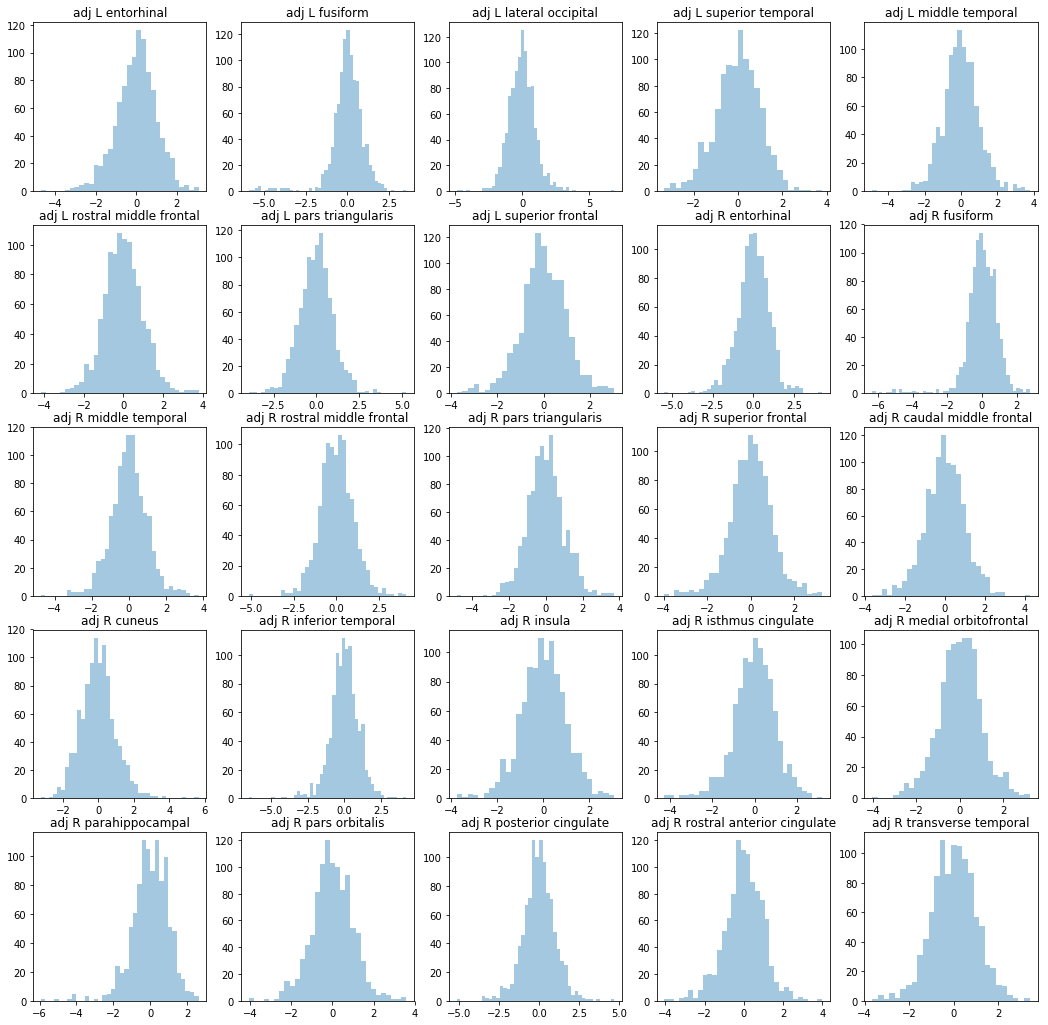

In [19]:
# check distribution of adjusted data in each ROI with a histogram

plt.figure(figsize = (18, 18)) 

for i, roi in enumerate(adj_roi_list):
    plt.subplot(5, 5, (i+1))
    sns.distplot(df[roi], kde = False)
    plt.xlabel('')
    plt.title('{}'.format(roi).replace('_', ' '))

Despite slight skews in some ROIs (e.g., L & R fusiform, R parahippocampal), overall the adjusted data appears acceptably normal, as the unadjusted data did.